In [1]:
import tensorflow as tf

In [3]:
tf.Session().run(tf.add(40,2))

42

In [1]:
#Imports

from __future__ import division

import gym
import numpy as np
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
import scipy.misc
import os
%matplotlib inline

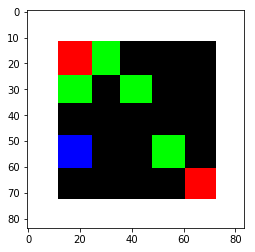

In [2]:
#Load game env

from gridworld import gameEnv
env = gameEnv(partial=False, size=5)

In [ ]:
class Qnetwork():
    def __init__(self.h_size):
        #h_size is number of output filters at the end of the final conv layer
        #In a regular DQN, this would just get flattened to get the Q-values for all actions
        #But here these output filter maps are going to be sent to the V and A networks
        
        #We get frame, flatten it using def processState(states) and then reshape it here
        
        self.scalarInput = tf.placeholder(shape=[None, 84*84*3], dtype=tf.float32)
        self.imageIn = tf.reshape(self.scalarInput, shape=[-1, 84, 84, 3])
        
        #CNN layers
        
        self.conv1 = slim.conv2d( 
            inputs=self.imageIn,
            num_outputs=32,
            kernel_size=[8,8],
            stride=[4,4],
            padding='VALID',
            biases_initializer=None
        )
        
        self.conv2 = slim.conv2d( 
            inputs=self.conv1,
            num_outputs=64,
            kernel_size=[4,4],
            stride=[2,2],
            padding='VALID',
            biases_initializer=None
        )        
        
        self.conv3 = slim.conv2d( 
            inputs=self.conv2,
            num_outputs=64,
            kernel_size=[3,3],
            stride=[1,1],
            padding='VALID',
            biases_initializer=None
        )
        
        self.conv4 = slim.conv2d( 
            inputs=self.conv3,
            num_outputs=h_size,
            kernel_size=[7,7],
            stride=[1,1],
            padding='VALID',
            biases_initializer=None
        )
        
        # In a regular DQN we'd flatten now and use Fully Connected layers
        # But here we split these feature maps in two streams and then flatten them 
        # Could we have flattened and then split?
        
        self.streamAC, self.streamVC = tf.split(self.conv4, 2, 3) #Split conv4 output into 2 parts, along last axis
        # Last axis here no longer denotes color 
        
        #Flatten
        self.streamA = slim.flatten(self.streamAC)
        self.streamV = slim.flatten(self.streamVC)
        
        #We put both A and V streams through 1 fully connected layer
        #So we need weight matrices for both
        #Random normal initialization
        self.AW = tf.Variable(tf.random_normal([h_size//2, env.actions])) 
        self.VW = tf.Variable(tf.random_normal([h_size//2, 1]))
        #Advantage values will be 1 per action based on the state
        #But just 1 V value for the state
        
        
         